# Basic Feedforward Network

In [1]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
from cifar_utils import load_data
from matplotlib import pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Part 1: Load Data

In [2]:
# Load the raw CIFAR-10 data.
X_train, y_train = load_data(mode='train')

# Data organizations:
# Train data: 49000 samples from original train set: 1~49000
# Validation data: 1000 samples from original train set: 49000~50000
num_training = 49000
num_validation = 1000

labels = np.unique(y_train)
num_labels = len(labels)
y_train = np.eye(num_labels)[y_train]

X_val = X_train[-num_validation:, :]
y_val = y_train[-num_validation:]

X_train = X_train[:num_training, :]
y_train = y_train[:num_training]

# Preprocessing: subtract the mean value across every dimension for training data, and reshape it to be RGB size
mean_image = np.mean(X_train, axis=0)
X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
X_val = X_val.astype(np.float32) - mean_image

X_train = X_train.reshape([-1,32,32,3]) / 255
X_val = X_val.reshape([-1,32,32,3]) / 255

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)

print(num_labels)

mean_image = np.mean(X_train, axis=0)
X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
X_val = X_val.astype(np.float32) - mean_image

./data/cifar-10-python.tar.gz already exists. Begin extracting...
Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000, 10)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000, 10)
10


# Create and Train Model

In [3]:
# Import the model
from cnn_model import *

In [4]:
# Initialize the model with the correct input and output shape
model = cnn(X_train.shape[1],X_train.shape[2],X_train.shape[3],num_labels,conv_featmap=[200],fc_layer_size=[250,100],kernel_size=[3],pool_size=[2],train_keep_prob=[.75,.75])

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [5]:
# Train the model and use test set for validation
model.train(X_train,y_train,X_val,y_val,epochs=5,batch_size=245,translate=[5,5],rotate=180,noise=.05)

number of batches for training: 800
epoch 1
Best validation accuracy! iteration:100 accuracy: 44.800000000000004%
Best validation accuracy! iteration:200 accuracy: 50.5%
Best validation accuracy! iteration:400 accuracy: 53.2%
Best validation accuracy! iteration:600 accuracy: 54.1%
epoch 2
Best validation accuracy! iteration:900 accuracy: 56.10000000000001%
Best validation accuracy! iteration:1200 accuracy: 57.4%
Best validation accuracy! iteration:1500 accuracy: 57.49999999999999%
epoch 3
Best validation accuracy! iteration:2000 accuracy: 59.3%
epoch 4
epoch 5
Traning ends. The best valid accuracy is 59.3. Model named basic_model.


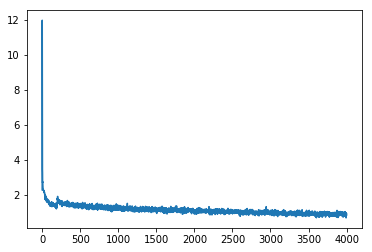

In [6]:
# Plot training loss
model.plot()

In [7]:
# Use predict to test output
shape = X_val[0].shape
test = np.reshape(X_val[0],(1,shape[0],shape[1],shape[2]))
prediction = model.predict(test)
print("Predicted label is ", labels[prediction[0]])
tested_y = np.ndarray.astype(y_val[0],bool)
print("Actual label is ",labels[tested_y])

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from model/basic_model
Predicted label is  [8]
Actual label is  [8]
